# SSD vgg16 object detection demo

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Disable auto scroll

In [5]:
from util.common import *
from models.ssd.util import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
init_engine()

Verify and read some environment information (e.g. executor number and executor core number)

In [7]:
# load object class names
with open("/home/xianyan/data/cocosample/classname.txt") as f:
    classes = f.read().splitlines()

print classes
print 'In total ', len(classes), 'classes'

['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
In total  81 classes


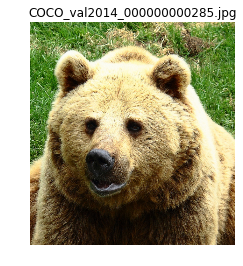

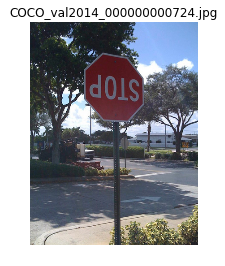

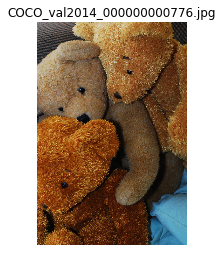

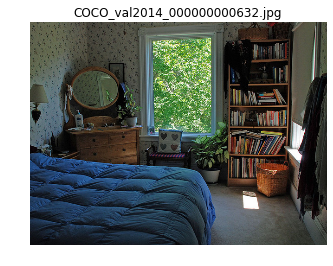

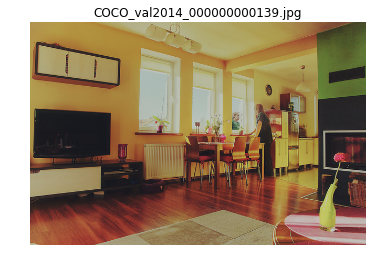

In [8]:
# load and show images
folder = "/home/xianyan/data/cocosample/images/val2014"
imageFiles = os.listdir(folder)
images = []
for f in imageFiles:
    image = mpimg.imread(folder + '/' + f)
    images.append(image)
    plt.imshow(image)
    plt.axis("off")
    plt.title(f)
    plt.show()

In [9]:
# load model
model = Model.load("/home/xianyan/data/ssd/ssd300x300coco.bigdl")
print 'load model done'

load model done


In [10]:
from ssd.ssd import *
# predict objects with scores
batch_size = 2
n_partition = 3
result = predict(300, batch_size, n_partition, folder, sc, model, len(classes))
print 'detection done'

detection done


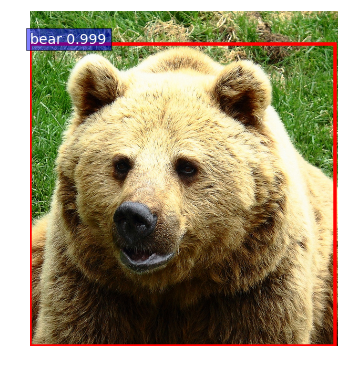

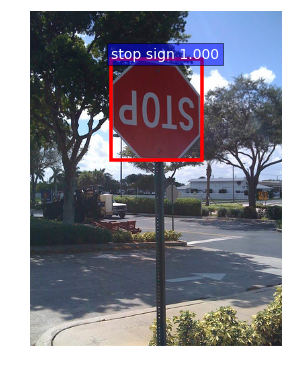

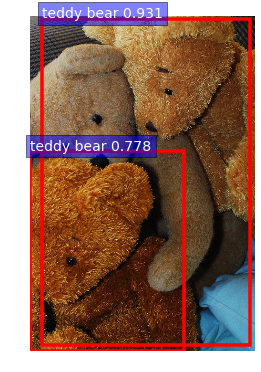

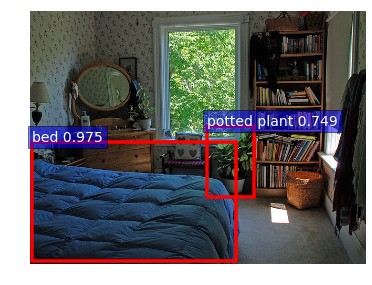

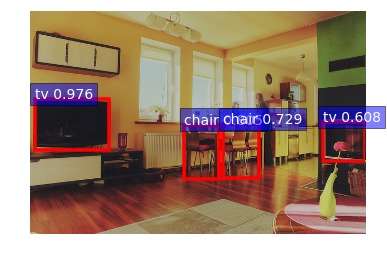

In [11]:
for img_id in range(len(result)):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(images[img_id])
    for cls_id in range(len(classes)):
        scores = result[img_id][0][cls_id]
        bboxes = result[img_id][1][cls_id]
        if scores is None:
            continue
        for i in range(len(scores)):
            if (scores[i] <= 0.6):
                continue
            ax.add_patch(
            plt.Rectangle((bboxes[i*4], bboxes[i*4+1]),
                          bboxes[i*4+2] - bboxes[i*4],
                          bboxes[i*4+3] - bboxes[i*4+1], fill=False,
                          edgecolor='red', linewidth=3.5)
            )
            ax.text(bboxes[i*4], bboxes[i*4+1] - 2,
                '{:s} {:.3f}'.format(classes[cls_id], scores[i]),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')
    plt.axis('off')
    plt.show()